# Python Translate Script - Jupyter Notebook

# Description
The objective of this jupyter notebook is to complete the tasks of Dr. X's python script. Tasks such as documenting functions, completing functions from pseudo-code, creating new data based upon provided data (and adding that information to an existing datafile) and finally, visualizing the data. 

# Dependencies
Biopython installation  
Pandas installation 
  
from Bio import SeqIO;  
from Bio.Data import CodonTable;  
import pandas as pd;  
from Bio.Seq import Seq;  
from Bio.SeqUtils.ProtParam import ProteinAnalysis;  
from Bio.SeqUtils import GC;    
import seaborn as sns

# Authors
Dr. X and Tyler Foster

# Date
April 25, 2022

In [1]:
##Install BioPython and Pandas if not already installed##

#Import the dependencies listed above:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
from Bio.Seq import Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils import GC
import seaborn as sns

# Functions 

### 1. Document Dr. X's function with comments and with markdown text.


### Function:  *get_sequences_from_file(fasta_fn)*

**Description:** Takes a fasta file and reduces the amount of information to just genus/species name and sequence information

**Arguments:**  
> 1. fasta_fn: fasta file to obtain sequences from

**Create before "for loop":** 
> 1. Empty dictonary for information to be stored in

**For loop - For each record within the fasta file:**
> 1. Splits each description,
> 2. Takes 2nd and 3rd positions of record and adds a space inbetween, create new object "species name"
> 3. Obtain the sequence information 
    
**Return:** A dictonary of records with genus name, species name and sequence information
   
**Example of usage:**  
>penguins_sequence_data = get_sequences_from_file("penguins_cytb.fasta")  
>print(penguins_sequence_data)

In [2]:
def get_sequences_from_file(fasta_fn): #def is the keyword for defining our function, "get_sequences_from_file(fasta_fn)"
    sequence_data_dict = {} #empty dictionary
    for record in SeqIO.parse(fasta_fn, "fasta"): #creating a for loop    
        description = record.description.split() 
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict) #ends the execution of a function and "returns" the value(s)

In [3]:
#Let's also load the example into our environment for later examples...
penguins_sequence_data = get_sequences_from_file("penguins_cytb.fasta")
print(penguins_sequence_data)

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'), 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'), 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'), 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'), 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'), 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'), 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'), 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAAC

### 2. Write a function that translates a string of nucleotides to amino acids based on Dr. X's pseudo-code suggestion.


### Function: *translate_function(string_nucleotides)*
**Description:** Takes a nucleotide sequence and translates that information to a string of amino acids

**Arguments:**
> 1. string_nucleotides: string of nucleotides

**Create before "for loop":** 
   > 1. mito_table object to connect a 3-nucleotide sequence to an amino acid
   > 2. codons object that iterates over the entire string of nucleotides and defines a codon at every 3rd position
   > 3. Empty list for information to be stored in
   > 4. stop codons object that defines which of the above amino acids are stop codons

**For loop**
   > 1. For a specific codon in our codons list -
   > 2. If that codon *is not* a stop codon:
   > 3. Append the list of sequences using the mito_table for amino acid information

**Create after "for loop":**
   > 1. Creating a string by joining ' ' with the list of amino acid sequence
    
**Return:** A string of amino acid sequence
   
**Example of usage:**   
>print(translate_function(penguins_sequence_data["Aptenodytes forsteri"]))

The following links were used to help writing this function:  
- [Convert List to String](https://stackoverflow.com/questions/5618878/how-to-convert-list-to-string)
- [Understanding for loops](https://www.learnpython.org/en/Loops)
- [Converting DNA to Amino Acids](https://www.learnpython.org/en/Loops)

In [4]:
def translate_function(string_nucleotides): #defining our function
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    codons = [(string_nucleotides[i:i + 3]) for i in range(0, len(string_nucleotides), 3)]
    amino_acid_seq_list = [] #empty list to put amino acid sequence into
    stop_codons = ["TAA", "TAG", "AGA", "AGG"] #defining our stop codons
    for codon in codons: 
        if codon not in stop_codons:
            amino_acid_seq_list.append(mito_table.forward_table[codon])
    amino_acid_seq_string = ''.join(amino_acid_seq_list)
    return(amino_acid_seq_string) #ends the execution of a function and "returns" the value(s)

In [5]:
#Testing our function example
print(translate_function(penguins_sequence_data["Aptenodytes forsteri"]))

MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH


### 3. Write an alternative translation function.

### Function: *alternate_translate_function(string_nucleotides2)*
**Description:** Takes a nucleotide sequence and translates that information to a string of amino acids

**Arguments:**
> 1. string_nucleotides2: string of nucleotides

**Must Create:**
> 1. alternate_mito table object, similar to the mito table object above
> 2. alternate_amino_acid sequence using the alternate mito table object and stating cds = 'True'
    - "*If True, this checks the sequence starts with a valid alternative start codon (which will be translated as methionine, M), that the sequence length is a multiple of three, and that there is a single in frame stop codon at the end (this will be excluded from the protein sequence, regardless of the to_stop option). If these tests fail, an exception is raised.*" [BioSeq module](https://biopython.org/docs/1.75/api/Bio.Seq.html)
> 3. alternate_amino_acid_seq_string object that converts the alternate amino acid sequence to a string
    
**Return:** A string of amino acid sequence
   
**Example of usage:**   
>print(alternate_translate_function(penguins_sequence_data["Aptenodytes forsteri"]))

The following link was used to help writing this function:  
- [BioSeq module](https://biopython.org/docs/1.75/api/Bio.Seq.html)

In [6]:
def alternate_translate_function(string_nucleotides2): #defining our function
    alternate_mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    alternate_amino_acid_seq = string_nucleotides2.translate(table = alternate_mito_table, cds = True)
    alternate_amino_acid_seq_string = str(alternate_amino_acid_seq) #convert to string
    return(alternate_amino_acid_seq_string)  #ends the execution of a function and "returns" the value(s)

In [7]:
#Testing our function example
print(alternate_translate_function(penguins_sequence_data["Aptenodytes forsteri"]))

MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH


### 4. Write a function that calculates the molecular weight of each amino acid sequence.

### Function: *compute_molecular_weight(amino_acid_sequence)*
**Description:** Takes a nucleotide sequence and translates that information to a string of amino acids

**Arguments:**
> 1. amino_acid_sequence: which is string of amino acids (created from either function 2 or 3)

**Must Create:**
> 1. protein_analysis object uses ProteinAnalysis package on the sequence of amino acid
> 2. mol_weight object that calculates the molecular weight of the protein_analysis object created
    
**Return:** The molecular weight of the amino acid sequence provided
   
**Example of usage:**   
>translate_A_forsteri = alternate_translate_function(penguins_sequence_data["Aptenodytes forsteri"])  
>mol_weight_A_forsteri = compute_molecular_weight(translate_A_forsteri)  
>print(mol_weight_A_forsteri)

The following link was used to help writing this function:  
- [ProtParam module](https://biopython.org/wiki/ProtParam)

In [8]:
def compute_molecular_weight(amino_acid_sequence):
    protein_analysis = ProteinAnalysis(amino_acid_sequence)
    mol_weight = protein_analysis.molecular_weight()
    return(mol_weight)

In [9]:
#Testing our function example
translate_A_forsteri = alternate_translate_function(penguins_sequence_data["Aptenodytes forsteri"])  
compute_molecular_weight(translate_A_forsteri)

42459.602100000004

### 5. Write a function that computes the GC-content of each DNA sequence.

### Function: *GC(sequence)*
**Description:** Takes a nucleotide sequence and translates that information to a string of amino acids

**Arguments:**
> 1. sequence: sequence of nucleotides 

**Must Create:**
> 1. gc object that counts the number of nucleotides of interest for a given sequence and sums the count
    
**Return:** Returning the GC content as a ratio by taking the gc object and dividing by the length of sequence fed into function
   
**Example of usage:**   
> nucleotide_A_forsteri = penguins_sequence_data["Aptenodytes forsteri"]  
> nucleotide_A_forsteri = str(nucleotide_A_forsteri)  
> GC(nucleotide_A_forsteri)

The following link was used to help writing this function:  
- [GC Content](https://github.com/biopython/biopython/blob/master/Bio/SeqUtils/__init__.py)

In [10]:
def GC(sequence): #defining our function
    gc = sum(sequence.count(x) for x in ["G", "C", "g", "c", "S", "s"])
    return gc / len(sequence) #ends the execution of a function and "returns" the value(s)

In [11]:
#Testing our function example
nucleotide_A_forsteri = penguins_sequence_data["Aptenodytes forsteri"]
nucleotide_A_forsteri = str(nucleotide_A_forsteri)
GC(nucleotide_A_forsteri)

0.48381452318460194

# Main

In [12]:
#code that was provided for "Main"
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 
penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)
print(cytb_seqs)

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'), 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'), 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'), 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'), 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'), 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'), 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'), 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAAC

### 6. Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
The following link was used to help perform the desired outcome in the code chunk below:  
- [Adding Columns in Pandas](https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/)

In [13]:
molecular_weight = ['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN'] #creating a blank list, denoted as "NaN"
GC_content = ['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN'] #creating a second blank list, denoted as "NaN"
penguins_df_copy = penguins_df.copy() #creating a copy of our dataframe
penguins_df_copy['molecular_weight'] = molecular_weight #adding the molecular weight column to dataframe using our defined list
penguins_df_copy['GC_content'] = GC_content #adding the GC_content column to dataframe using our defined list

print(penguins_df_copy) #checking to see that the code worked correctly

                    species   mass molecular_weight GC_content
0      Aptenodytes forsteri  28.00              NaN        NaN
1   Aptenodytes patagonicus  13.40              NaN        NaN
2       Eudyptes chrysocome   2.80              NaN        NaN
3     Eudyptes chrysolophus   4.50              NaN        NaN
4         Eudyptes sclateri   4.25              NaN        NaN
5           Eudyptula minor   1.60              NaN        NaN
6        Pygoscelis adeliae   4.60              NaN        NaN
7     Pygoscelis antarctica   4.10              NaN        NaN
8          Pygoscelis papua   6.10              NaN        NaN
9       Spheniscus demersus   3.20              NaN        NaN
10     Spheniscus humboldti   4.75              NaN        NaN
11  Spheniscus magellanicus   3.40              NaN        NaN


### 7. Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content
The following link was used to help perform the desired outcome in the code chunk below:  
- [For loops with dictionaries](https://realpython.com/iterate-through-dictionary-python/)
- [More for loop info](https://stackoverflow.com/questions/64199164/why-python-only-printing-the-last-key-from-dictionary)
- [Update Dataframe values](https://stackoverflow.com/questions/24036911/how-to-update-values-in-a-specific-row-in-a-python-pandas-dataframe)

In [14]:
aa_seq = () #create empty tuple for amino acid sequence
gc_content = () #create empty tuple for gc content
molecular_weight = () #create empty tuple for molecular weight
for species, sequence in cytb_seqs.items(): #write for loop
    aa_seq = alternate_translate_function(sequence) #use function 3 to translate nucleotide info to amino acid info
    molecular_weight = compute_molecular_weight(alternate_translate_function(sequence)) #use function 4
    gc_content = GC(sequence) #use function 5
    penguins_df_copy.loc[penguins_df_copy["species"] == species, "molecular_weight"] = molecular_weight #convert "NaN" values to appropriate molecular weight value
    penguins_df_copy.loc[penguins_df_copy["species"] == species, "GC_content"] = gc_content #convert "NaN" values to appropriate GC_content value

In [15]:
#Testing to see if the for loop worked for our dataframe
print(penguins_df_copy)

                    species   mass molecular_weight GC_content
0      Aptenodytes forsteri  28.00       42459.6021   0.483815
1   Aptenodytes patagonicus  13.40       42563.7067   0.496938
2       Eudyptes chrysocome   2.80       42475.5753   0.511811
3     Eudyptes chrysolophus   4.50       42445.5493   0.509186
4         Eudyptes sclateri   4.25       42475.5753   0.508311
5           Eudyptula minor   1.60       42491.6408   0.492563
6        Pygoscelis adeliae   4.60        42458.614   0.490814
7     Pygoscelis antarctica   4.10       42404.5423    0.47769
8          Pygoscelis papua   6.10       42595.8759   0.471566
9       Spheniscus demersus   3.20        42431.549    0.48294
10     Spheniscus humboldti   4.75        42399.552   0.492563
11  Spheniscus magellanicus   3.40       42459.6021   0.482065


### 8. Plot a bar-chart of the mass with the x-axes labeled with species names.
The following links were used to help perform the desired outcome in the code chunk below:   
- [Seaborn barplots](https://seaborn.pydata.org/generated/seaborn.barplot.html)  
- [Seabron vertical x labels](https://www.delftstack.com/howto/seaborn/rotate-tick-labels-seaborn/)
- [Change order of plot](https://datavizpyr.com/sort-bars-in-barplot-using-seaborn-in-python/)

[Text(0, 0, 'Eudyptula minor'),
 Text(1, 0, 'Eudyptes chrysocome'),
 Text(2, 0, 'Spheniscus demersus'),
 Text(3, 0, 'Spheniscus magellanicus'),
 Text(4, 0, 'Pygoscelis antarctica'),
 Text(5, 0, 'Eudyptes sclateri'),
 Text(6, 0, 'Eudyptes chrysolophus'),
 Text(7, 0, 'Pygoscelis adeliae'),
 Text(8, 0, 'Spheniscus humboldti'),
 Text(9, 0, 'Pygoscelis papua'),
 Text(10, 0, 'Aptenodytes patagonicus'),
 Text(11, 0, 'Aptenodytes forsteri')]

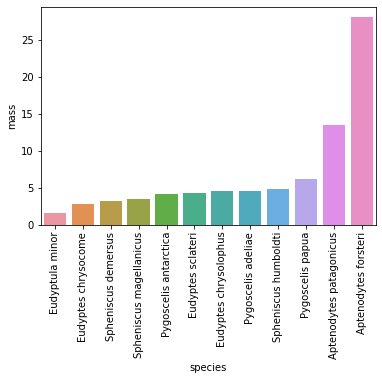

In [16]:
ax = sns.barplot(x='species', y='mass', data= penguins_df_copy, 
                 order=penguins_df_copy.sort_values('mass').species) #changes order from least to greatest
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90) #changes x ticks for barplot to be vertical

### Question 1: What is the smallest penguin species? 
***Eudyptula minor***
### Question 2: What is the geographical range of this species?
***Eudyptula minor* can be found on the coast of southern Australia as well as coasts of New Zealand. In addition, reports of residency on South Solitary Island off the coast of New South Wales.** [*Eudyptula minor*](https://animaldiversity.org/accounts/Eudyptula_minor/)

### 9. Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).
The following link was used to help perform the desired outcome in the code chunk below:
- [More seaborn information from class notes](https://eeob-biodata.github.io/BCB546X-python/05-seaborn-viz/)

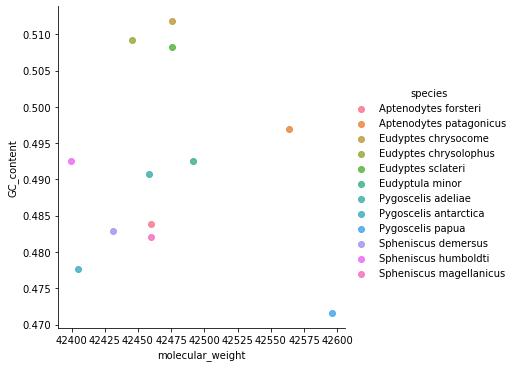

In [17]:
sns.lmplot(x="molecular_weight", y="GC_content", data=penguins_df_copy, fit_reg=False, hue ='species')
#added hue to make connection of the function of molecular weight to GC_content to a species

### 10. Save the new DataFrame to a file called "penguins_mass_cytb.csv"
The following link was used to help perform the desired outcome in the code chunk below:  
- [Saving to csv in pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html)

In [18]:
penguins_df_copy.to_csv('penguins_mass_cytb.csv', index=False)

### 11. BONUS

### Function:  *new_translation(codons)*

**Description:** Takes a fasta file and reduces the amount of information to just genus/species name and amino acid sequence information

**Arguments:**  
> 1. codons_fn: fasta file to obtain sequences from

**Create before "for loop":** 
> 1. Empty dictonary for information to be stored in

**For loop - For each record within the fasta file:**
> 1. Splits each description,
> 2. Takes 2nd and 3rd positions of record and adds a space inbetween, create new object "species name"
> 3. Obtain the sequence information from fasta file and translate into codon information
    
**Return:** A dictonary of records with genus name, species name and amino acid sequence information
   
**Example of usage:**  
>penguins_translation = new_translation("penguins_cytb.fasta")  
>print(penguins_translation)

In [19]:
#Creating a dictionary, similar to function 1, but has amino acids instead of nucleotides
def new_translation(codons_fn): 
    translation_data_dict = {}
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    for record in SeqIO.parse(codons_fn, "fasta"):    
        description = record.description.split() 
        species_name = description[1] + " " + description[2]
        translation_data_dict[species_name] = [record.seq.translate(table=mito_table, cds=True)]
    return(translation_data_dict) 

In [20]:
#Checking to see if function works with example
penguins_translation = new_translation("penguins_cytb.fasta")
print(penguins_translation)

{'Aptenodytes forsteri': [Seq('MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAM...LNH')], 'Aptenodytes patagonicus': [Seq('MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAM...LNH')], 'Eudyptes chrysocome': [Seq('MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAA...LNH')], 'Eudyptes chrysolophus': [Seq('MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAA...LNH')], 'Eudyptes sclateri': [Seq('MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAA...LNH')], 'Eudyptula minor': [Seq('MAPNLRKSHPLLKMINNSLIDLPTPSNISTWWNFGSLLGICLITQILTGLLLAA...LSH')], 'Pygoscelis adeliae': [Seq('MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAM...LNH')], 'Pygoscelis antarctica': [Seq('MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAM...LNF')], 'Pygoscelis papua': [Seq('MAPNLRKSHPLLKMINKSLIDLPTPPNISAWWNFGSLLGICLITQILTGLLLAM...LNF')], 'Spheniscus demersus': [Seq('MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAA...LNH')], 'Spheniscus humboldti': [Seq('MAPNLRKSHPLLKTINNSLIDLPTPSNISA

[Text(0, 0, 'Eudyptes chrysocome'),
 Text(1, 0, 'Eudyptes chrysolophus'),
 Text(2, 0, 'Eudyptes sclateri'),
 Text(3, 0, 'Aptenodytes patagonicus'),
 Text(4, 0, 'Eudyptula minor'),
 Text(5, 0, 'Spheniscus humboldti'),
 Text(6, 0, 'Pygoscelis adeliae'),
 Text(7, 0, 'Aptenodytes forsteri'),
 Text(8, 0, 'Spheniscus demersus'),
 Text(9, 0, 'Spheniscus magellanicus'),
 Text(10, 0, 'Pygoscelis antarctica'),
 Text(11, 0, 'Pygoscelis papua')]

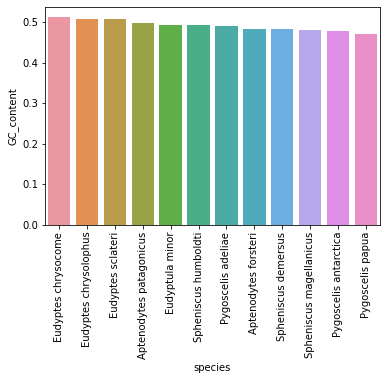

In [21]:
#Plotting species by GC_content in decending order
ax2 = sns.barplot(x='species', y='GC_content', data= penguins_df_copy,
                 order=penguins_df_copy.sort_values('GC_content', ascending = False).species) #changes order greatest to least
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90) #changes x ticks for barplot to be vertical